# Analysis and Classification of Animal  Data

The idea of this notebook is to understand Animal data from 'AnAge Database of Animal Ageing and Longevity' (url:'http://genomics.senescence.info/species/') and try to Classify 'Order' of the animals based on there Numerical Characterstics. The project consists of two notebooks, first explores the overall data and tries to find a baseline model for classification. The second notebooks deals with each features in detail trying to fill the missing data and Tune the hyperparametrs.

Zoologists classify animals into different catagories like 'Kingdom', 'Phylum', 'Class', 'Order' etc. In the given dataset the Classifiactions are already done, for sake of learning I will remove the Order of animals of 'Class: Mammalia' and try to predict it using Data Science techniques.

Let's start exploring our data.


In [1]:
# Importing Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading Data into dataframe
df=pd.read_table('C:\\python\\study\\dataset\\anage_data.txt')

In [3]:
df.head()

,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),...,Source,Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),References
0,3,Animalia,Arthropoda,Branchiopoda,Diplostraca,Daphniidae,Daphnia,pulicaria,Daphnia,NaN,...,NaN,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"1294,1295,1296"
1,5,Animalia,Arthropoda,Insecta,Diptera,Drosophilidae,Drosophila,melanogaster,Fruit fly,7.0,...,NaN,captivity,large,acceptable,0.05,0.04,NaN,NaN,NaN,"2,20,32,47,53,68,69,240,241,242,243,274,602,98..."
2,6,Animalia,Arthropoda,Insecta,Hymenoptera,Apidae,Apis,mellifera,Honey bee,NaN,...,812,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"63,407,408,741,805,806,808,812,815,828,830,831..."
3,8,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Cardiocondyla,obscurior,Cardiocondyla obscurior,NaN,...,1293,captivity,medium,acceptable,NaN,NaN,NaN,NaN,NaN,1293
4,9,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Lasius,niger,Black garden ant,NaN,...,411,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"411,813,814"


In [4]:
df.shape

(4219, 31)

There is a lot of spaces in the columns names so lets try  to clean the names of columns and put into a dictionary.

In [5]:
d1={'HAGRID':'Hagrid', 'Common name':'Common_name', 'Female maturity (days)':'Female_maturity_days',
       'Male maturity (days)':'Male_maturity_days', 'Gestation/Incubation (days)':'Gestation_Incubation_days',
       'Weaning (days)':'Weaning_days',
       'Litter/Clutch size':'Litter_Clutch_size', 'Litters/Clutches per year':'Litters_Clutches_per_year',
       'Inter-litter/Interbirth interval':'Inter_litter_Interbirth_interval', 'Birth weight (g)':'Birth_weight_g',
       'Weaning weight (g)':'Weaning_weight_g', 'Adult weight (g)':'Adult_weight_g', 'Growth rate (1/days)':'Growth_rate_1_days_',
       'Maximum longevity (yrs)':'Maximum_longevity_yrs', 'Specimen origin':'Specimen_origin', 'Sample size':'Sample_size',
       'Data quality':'Data_quality', 'IMR (per yr)':'IMR_per_yr', 'MRDT (yrs)':'MRDT_yrs', 'Metabolic rate (W)':'Metabolic_rate_W',
       'Body mass (g)':'Body_mass_g', 'Temperature (K)':'Temperature_K'}

In [6]:
df.rename(columns=d1,inplace=True) # change the column names

To keep things simple and intersting we will concentrate on Mammals only.

In [91]:
mam=df.loc[df.Class=='Mammalia'] # Extract the mammals out of data

In [92]:
mam.head()

,Hagrid,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common_name,Female_maturity_days,...,Source,Specimen_origin,Sample_size,Data_quality,IMR_per_yr,MRDT_yrs,Metabolic_rate_W,Body_mass_g,Temperature_K,References
1530,1542,Animalia,Chordata,Mammalia,Afrosoricida,Tenrecidae,Echinops,telfairi,Lesser hedgehog tenrec,365.0,...,671,captivity,medium,acceptable,NaN,NaN,0.750,116.4,307.85,"36,148,434,455,542,610,671,678,680,731,1030,1103"
1531,1543,Animalia,Chordata,Mammalia,Afrosoricida,Tenrecidae,Geogale,aurita,Large-eared tenrec,NaN,...,NaN,unknown,small,low,NaN,NaN,0.043,6.9,303.95,"36,420,434,613,678"
1532,1544,Animalia,Chordata,Mammalia,Afrosoricida,Tenrecidae,Hemicentetes,semispinosus,Streaked tenrec,35.0,...,671,captivity,small,questionable,NaN,NaN,0.380,116.4,308.15,"36,420,434,436,455,542,610,671,678,680"
1533,1545,Animalia,Chordata,Mammalia,Afrosoricida,Tenrecidae,Microgale,dobsoni,Dobson's shrew tenrec,669.0,...,434,captivity,small,acceptable,NaN,NaN,0.315,44.6,304.05,"36,420,434,455,610,678,731"
1534,1546,Animalia,Chordata,Mammalia,Afrosoricida,Tenrecidae,Microgale,talazaci,Talazac's shrew tenrec,639.0,...,434,captivity,small,acceptable,NaN,NaN,0.243,44.0,303.95,"36,420,434,455,731"


As these are all animals and Vertibrates, we delete the first three columns.

In [93]:
mam.drop(columns=['Hagrid','Kingdom','Phylum'],inplace=True)

C:\Users\aradh\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [94]:
mam.head()

,Class,Order,Family,Genus,Species,Common_name,Female_maturity_days,Male_maturity_days,Gestation_Incubation_days,Weaning_days,...,Source,Specimen_origin,Sample_size,Data_quality,IMR_per_yr,MRDT_yrs,Metabolic_rate_W,Body_mass_g,Temperature_K,References
1530,Mammalia,Afrosoricida,Tenrecidae,Echinops,telfairi,Lesser hedgehog tenrec,365.0,365.0,55.0,29.0,...,671,captivity,medium,acceptable,NaN,NaN,0.750,116.4,307.85,"36,148,434,455,542,610,671,678,680,731,1030,1103"
1531,Mammalia,Afrosoricida,Tenrecidae,Geogale,aurita,Large-eared tenrec,NaN,NaN,63.0,37.0,...,NaN,unknown,small,low,NaN,NaN,0.043,6.9,303.95,"36,420,434,613,678"
1532,Mammalia,Afrosoricida,Tenrecidae,Hemicentetes,semispinosus,Streaked tenrec,35.0,NaN,59.0,21.0,...,671,captivity,small,questionable,NaN,NaN,0.380,116.4,308.15,"36,420,434,436,455,542,610,671,678,680"
1533,Mammalia,Afrosoricida,Tenrecidae,Microgale,dobsoni,Dobson's shrew tenrec,669.0,669.0,61.0,29.0,...,434,captivity,small,acceptable,NaN,NaN,0.315,44.6,304.05,"36,420,434,455,610,678,731"
1534,Mammalia,Afrosoricida,Tenrecidae,Microgale,talazaci,Talazac's shrew tenrec,639.0,639.0,61.0,29.0,...,434,captivity,small,acceptable,NaN,NaN,0.243,44.0,303.95,"36,420,434,455,731"


Let's explore 'Order', this is what we remove later and try to predict.

In [95]:
mam.Order.value_counts().head(10)

Rodentia           358
Carnivora          205
Primates           174
Artiodactyla       172
Chiroptera          96
Diprotodontia       72
Cetacea             45
Dasyuromorphia      38
Soricomorpha        33
Didelphimorphia     20
Name: Order, dtype: int64

Apart from few not many other seem to be well known. let's see few of them.

In [4]:
from IPython.display import Image

![title](https://github.com/Rohit-Mishra04/AnimalData/blob/master/animal%20images/290px-Rodent_collage.jpg?raw=true)

                                                            Rodentia


![](https://github.com/Rohit-Mishra04/AnimalData/blob/master/animal%20images/The_Cetacea.jpg
a.jpg?raw=true)

In [7]:
#Image(filename=('C:\\python\\animal images\\The_Cetacea.jpg'),height=400,width=300)

![](https://github.com/Rohit-Mishra04/AnimalData/blob/master/animal%20images/The_Artiodactyla.jpg?raw=true)

                                                  Artiodactyla

![](https://github.com/Rohit-Mishra04/AnimalData/blob/master/animal%20images/The_Cetacea.jpg?raw=true)

                                                    The_Cetacea

![](https://github.com/Rohit-Mishra04/AnimalData/blob/master/animal%20images/102816_ew_meetingbrief_free.jpg?raw=true)

                                                Primates

<BarContainer object of 28 artists>

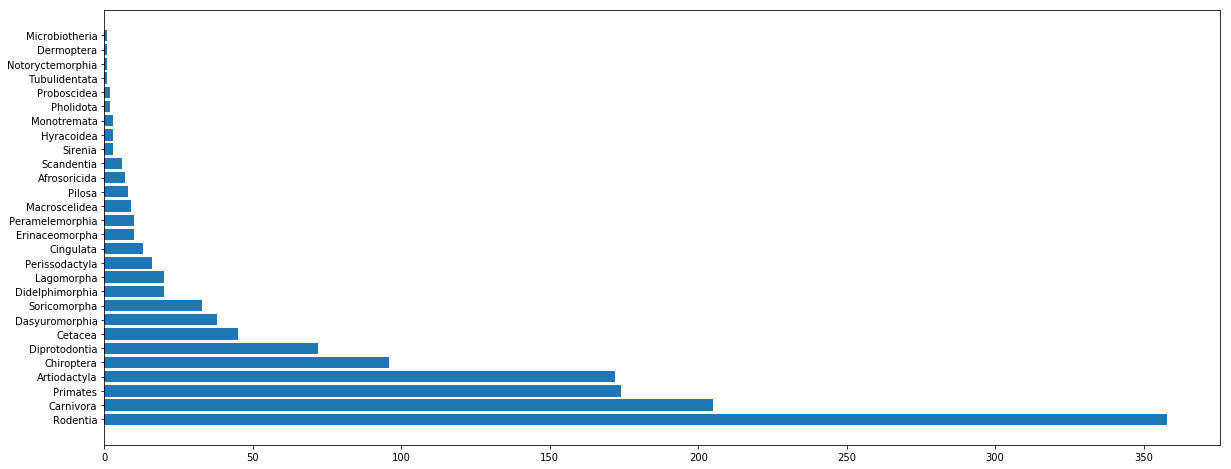

In [96]:
#Distribution of differnt 'Order'
plt.figure(figsize=(20,8))
plt.barh(mam.Order.value_counts().index,mam.Order.value_counts())

A small detour, to study humans !!! It would be intresting to see apart from intelligence is there anything else that is unique in humans. We compare humans with other 'Great Apes'

In [45]:
apes=mam.loc[mam.Family=='Hominidae']

In [59]:
apes

,Class,Order,Family,Genus,Species,Common_name,Female_maturity_days,Male_maturity_days,Gestation_Incubation_days,Weaning_days,...,Source,Specimen_origin,Sample_size,Data_quality,IMR_per_yr,MRDT_yrs,Metabolic_rate_W,Body_mass_g,Temperature_K,References
2406,Mammalia,Primates,Hominidae,Gorilla,gorilla,Gorilla,2829.0,4015.0,256.0,834.0,...,1151,captivity,large,acceptable,NaN,NaN,NaN,NaN,308.65,"59,341,342,434,436,455,467,610,671,679,680,681..."
2407,Mammalia,Primates,Hominidae,Homo,sapiens,Human,4745.0,5110.0,280.0,639.0,...,29,captivity,huge,high,0.0002,8.0,82.78,70000.0,310.15,"2,13,14,29,30,31,36,58,59,65,75,76,110,111,121..."
2408,Mammalia,Primates,Hominidae,Pan,paniscus,Pygmy chimpanzee or bonobo,3194.0,NaN,232.0,635.0,...,671,captivity,tiny,acceptable,NaN,NaN,NaN,NaN,NaN,"108,256,323,324,434,436,455,463,467,569,590,67..."
2409,Mammalia,Primates,Hominidae,Pan,troglodytes,Chimpanzee,3376.0,2920.0,229.0,1111.0,...,671,captivity,large,acceptable,0.0400,8.0,NaN,NaN,308.85,"8,59,72,73,234,235,236,237,238,239,256,323,434..."
2410,Mammalia,Primates,Hominidae,Pongo,pygmaeus,Orangutan,2555.0,2555.0,249.0,1003.0,...,671,captivity,large,acceptable,NaN,NaN,NaN,NaN,NaN,"59,75,108,164,214,215,434,436,455,467,610,671,..."


In [57]:
L2=apes.Common_name
L2[2408 ]='bonobo'# change the common name due to visibility



C:\Users\aradh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,1,'Birth Weight')

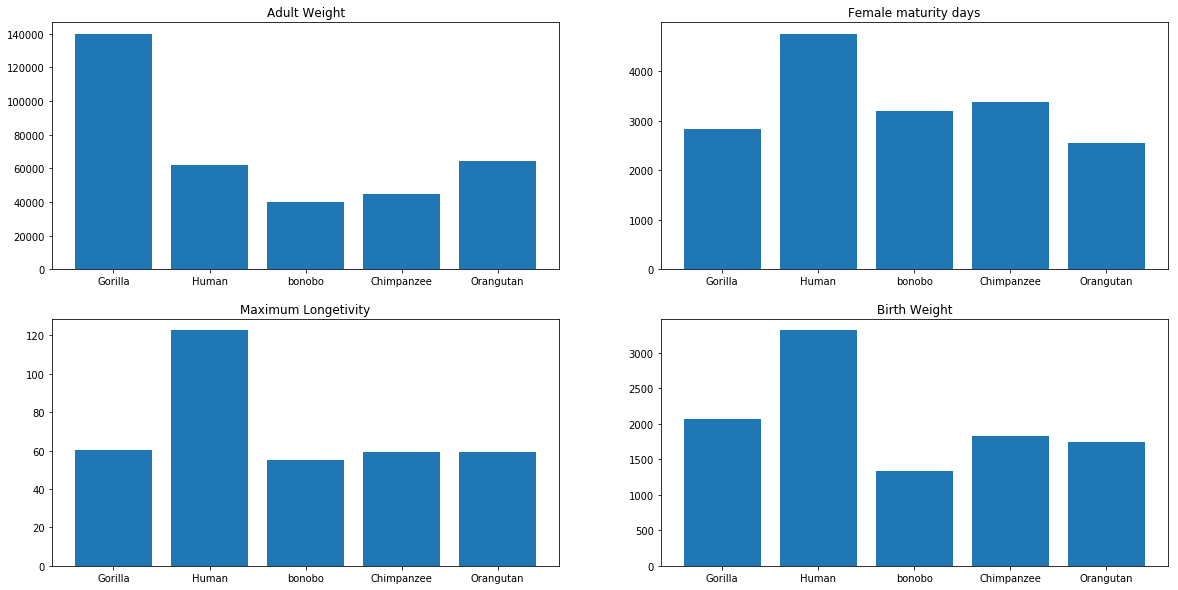

In [69]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.bar(L2,apes.Adult_weight_g)
plt.title('Adult Weight')
plt.subplot(222)
plt.bar(L2,apes.Female_maturity_days)
plt.title('Female maturity days')
plt.subplot(223)
plt.bar(L2,apes.Maximum_longevity_yrs)
plt.title('Maximum Longetivity')
plt.subplot(224)
plt.bar(L2,apes.Birth_weight_g)
plt.title('Birth Weight')

Very Interesting observations. Inspite of moderate weight as adult, Humans are born heavier, Take a long time to grow and most strikingly, have a far longer lifespan than other apes.
Back to our Mammal Dataframe.

let us see the describe our mammal dataFrame

In [70]:
mam.describe()

,Female_maturity_days,Male_maturity_days,Gestation_Incubation_days,Weaning_days,Litter_Clutch_size,Litters_Clutches_per_year,Inter_litter_Interbirth_interval,Birth_weight_g,Weaning_weight_g,Adult_weight_g,Growth_rate_1_days_,Maximum_longevity_yrs,IMR_per_yr,MRDT_yrs,Metabolic_rate_W,Body_mass_g,Temperature_K
count,860.000000,574.000000,1024.000000,810.000000,1232.000000,813.000000,656.000000,8.490000e+02,4.050000e+02,1.310000e+03,250.000000,1012.000000,15.000000,17.000000,422.000000,4.220000e+02,457.000000
mean,685.967442,806.604530,121.554688,143.759259,2.539866,1.569459,355.807927,1.656514e+04,5.470319e+04,4.618394e+05,0.027931,19.826581,0.040493,6.447059,16.752974,1.904198e+04,309.730306
std,772.129778,922.912382,107.963242,165.824986,2.050873,1.204807,274.439414,1.287223e+05,8.462728e+05,5.473929e+06,0.032425,15.551026,0.090328,5.695845,118.526036,1.834545e+05,1.756006
min,24.000000,36.000000,10.000000,7.000000,1.000000,0.100000,20.000000,4.000000e-03,2.065000e+00,2.100000e+00,0.000300,2.100000,0.000200,0.300000,0.027000,2.400000e+00,303.850000
25%,243.000000,291.750000,31.000000,36.000000,1.000000,1.000000,181.250000,4.460000e+00,2.170000e+01,1.050000e+02,0.007925,9.375000,0.002000,2.000000,0.333500,4.477500e+01,308.700000
50%,391.500000,460.000000,76.500000,77.000000,2.000000,1.000000,365.000000,5.550000e+01,2.140000e+02,1.399300e+03,0.017750,17.150000,0.015000,4.000000,0.881500,2.400000e+02,309.850000
75%,803.750000,914.000000,180.000000,182.750000,3.525000,2.000000,365.000000,7.000000e+02,2.170000e+03,1.157500e+04,0.035850,25.425000,0.030000,8.000000,4.502500,2.360075e+03,311.150000
max,8212.000000,8212.000000,670.000000,1111.000000,22.200000,10.000000,1825.000000,2.000000e+06,1.700000e+07,1.360000e+08,0.216000,211.000000,0.360000,20.000000,2336.500000,3.672000e+06,313.850000


In [97]:
num_col=mam.describe().columns # we extract the numerical columns for future use

Let us try to explore missing data status

In [98]:
mam.isnull().sum()

Class                                  0
Order                                  0
Family                                 0
Genus                                  0
Species                                0
Common_name                            0
Female_maturity_days                 469
Male_maturity_days                   755
Gestation_Incubation_days            305
Weaning_days                         519
Litter_Clutch_size                    97
Litters_Clutches_per_year            516
Inter_litter_Interbirth_interval     673
Birth_weight_g                       480
Weaning_weight_g                     924
Adult_weight_g                        19
Growth_rate_1_days_                 1079
Maximum_longevity_yrs                317
Source                               319
Specimen_origin                        0
Sample_size                            0
Data_quality                           0
IMR_per_yr                          1314
MRDT_yrs                            1312
Metabolic_rate_W

Text(0.5,1,'percentage missing data')

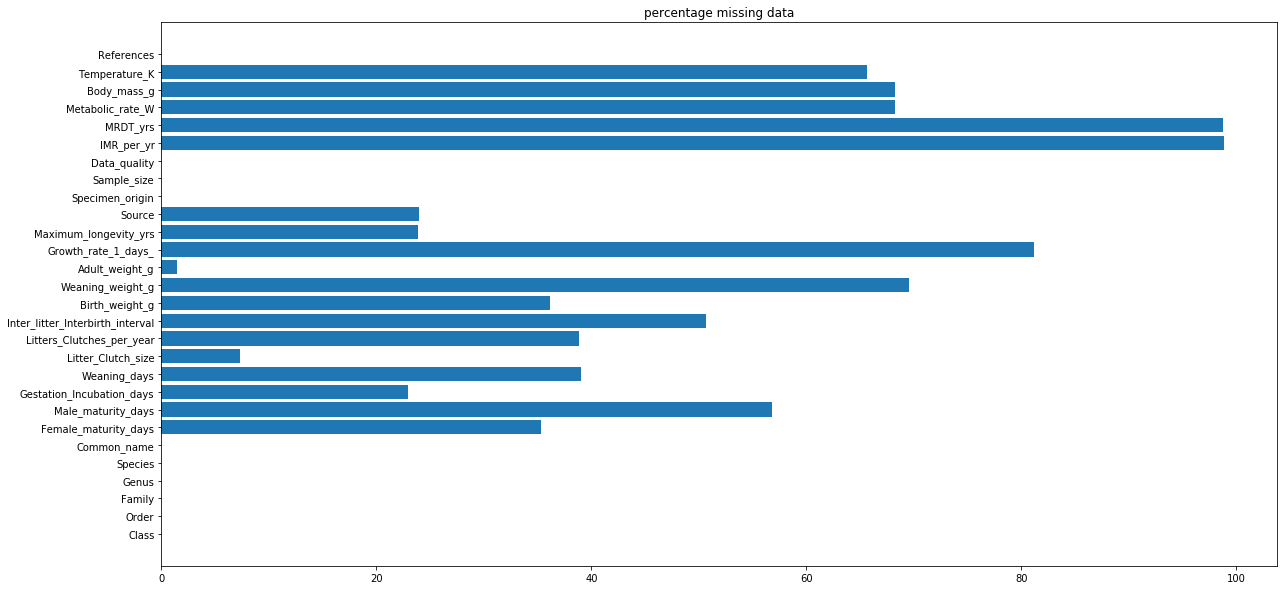

In [99]:
plt.figure(figsize=(20,10))
plt.barh(mam.isnull().sum().index,mam.isnull().sum()/len(mam)*100)
plt.title('percentage missing data')

we see there are some features which have more than 70% data missing and many with more than 25% missing.
Let's analyse.

In [80]:
mam.head(3)

,Class,Order,Family,Genus,Species,Common_name,Female_maturity_days,Male_maturity_days,Gestation_Incubation_days,Weaning_days,...,Source,Specimen_origin,Sample_size,Data_quality,IMR_per_yr,MRDT_yrs,Metabolic_rate_W,Body_mass_g,Temperature_K,References
1530,Mammalia,Afrosoricida,Tenrecidae,Echinops,telfairi,Lesser hedgehog tenrec,365.0,365.0,55.0,29.0,...,671,captivity,medium,acceptable,NaN,NaN,0.750,116.4,307.85,"36,148,434,455,542,610,671,678,680,731,1030,1103"
1531,Mammalia,Afrosoricida,Tenrecidae,Geogale,aurita,Large-eared tenrec,NaN,NaN,63.0,37.0,...,NaN,unknown,small,low,NaN,NaN,0.043,6.9,303.95,"36,420,434,613,678"
1532,Mammalia,Afrosoricida,Tenrecidae,Hemicentetes,semispinosus,Streaked tenrec,35.0,NaN,59.0,21.0,...,671,captivity,small,questionable,NaN,NaN,0.380,116.4,308.15,"36,420,434,436,455,542,610,671,678,680"


Features like 'Family','Genus','Species' are catogorical values which has been already classified, this might provide clues to model. The purpose of the model is to predict 'Order' based on physical characterstics. So we drop these columns. 'Reference' and 'Common_name' columns too doesn't seem to be meaningfull. 

In [100]:
mam.drop(columns=['Class','Family','Genus','Species','Common_name','References'],inplace=True)

C:\Users\aradh\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


'Specimen_origin', 'Sample_size', 'Data_quality'   have Catagorical Value which can have some meaning, we will encode them later. For now we try to limit to numerical data

In [102]:
mam.drop(columns=['Specimen_origin','Sample_size','Data_quality','Source'],inplace=True)

C:\Users\aradh\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [103]:
mam.head()

,Order,Female_maturity_days,Male_maturity_days,Gestation_Incubation_days,Weaning_days,Litter_Clutch_size,Litters_Clutches_per_year,Inter_litter_Interbirth_interval,Birth_weight_g,Weaning_weight_g,Adult_weight_g,Growth_rate_1_days_,Maximum_longevity_yrs,IMR_per_yr,MRDT_yrs,Metabolic_rate_W,Body_mass_g,Temperature_K
1530,Afrosoricida,365.0,365.0,55.0,29.0,6.00,1.0,NaN,7.67,50.0,180.0,0.0301,19.0,NaN,NaN,0.750,116.4,307.85
1531,Afrosoricida,NaN,NaN,63.0,37.0,3.90,2.0,NaN,0.70,NaN,6.7,NaN,NaN,NaN,NaN,0.043,6.9,303.95
1532,Afrosoricida,35.0,NaN,59.0,21.0,4.00,2.0,NaN,11.50,NaN,180.0,NaN,2.7,NaN,NaN,0.380,116.4,308.15
1533,Afrosoricida,669.0,669.0,61.0,29.0,2.67,NaN,NaN,3.95,NaN,37.8,0.0266,5.6,NaN,NaN,0.315,44.6,304.05
1534,Afrosoricida,639.0,639.0,61.0,29.0,2.00,NaN,NaN,3.60,NaN,50.0,0.0298,5.8,NaN,NaN,0.243,44.0,303.95


In [105]:
mam.dtypes

Order                                object
Female_maturity_days                float64
Male_maturity_days                  float64
Gestation_Incubation_days           float64
Weaning_days                        float64
Litter_Clutch_size                  float64
Litters_Clutches_per_year           float64
Inter_litter_Interbirth_interval    float64
Birth_weight_g                      float64
Weaning_weight_g                    float64
Adult_weight_g                      float64
Growth_rate_1_days_                 float64
Maximum_longevity_yrs               float64
IMR_per_yr                          float64
MRDT_yrs                            float64
Metabolic_rate_W                    float64
Body_mass_g                         float64
Temperature_K                       float64
dtype: object

In [104]:
# Checking the missing Values proportion now
mam.isnull().sum()/len(mam)*100

Order                                0.000000
Female_maturity_days                35.289691
Male_maturity_days                  56.809631
Gestation_Incubation_days           22.949586
Weaning_days                        39.051919
Litter_Clutch_size                   7.298721
Litters_Clutches_per_year           38.826185
Inter_litter_Interbirth_interval    50.639579
Birth_weight_g                      36.117381
Weaning_weight_g                    69.525959
Adult_weight_g                       1.429646
Growth_rate_1_days_                 81.188864
Maximum_longevity_yrs               23.852521
IMR_per_yr                          98.871332
MRDT_yrs                            98.720843
Metabolic_rate_W                    68.246802
Body_mass_g                         68.246802
Temperature_K                       65.613243
dtype: float64

There are features with more than 80% data missing. We drop them now.

In [106]:
mam.drop(columns=['IMR_per_yr','MRDT_yrs','Growth_rate_1_days_'],inplace=True)

C:\Users\aradh\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Let's try  to find correlation between data so that we can drop columns if there is strong correlataion and lot missing data assuming redundancy.

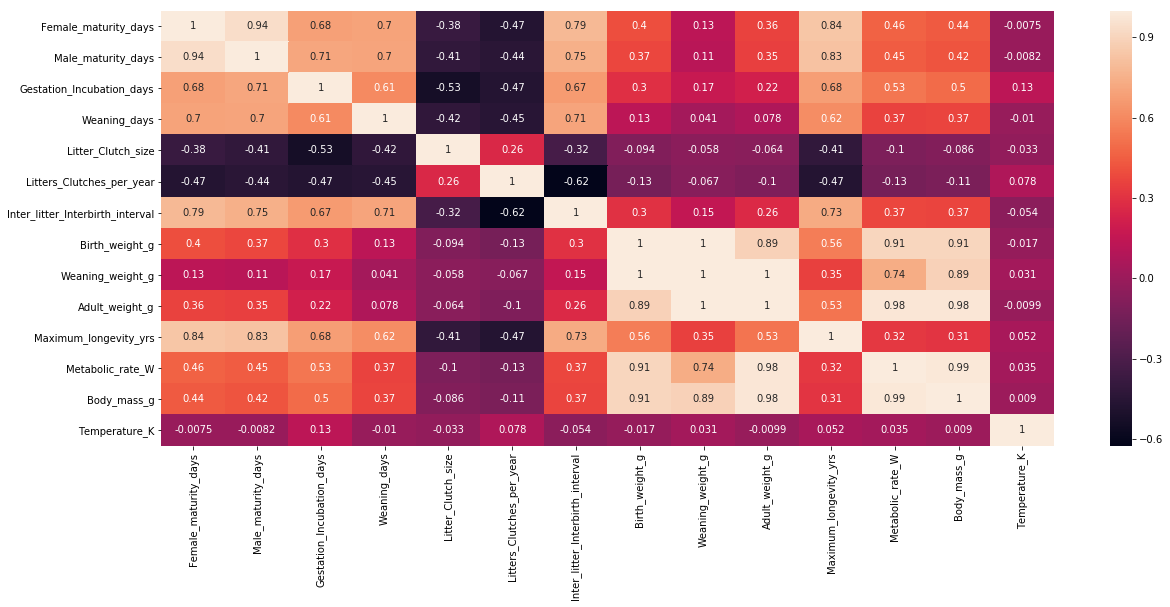

In [111]:
plt.figure(figsize=(20,8))
sns.heatmap(mam.corr(),annot=True)

We see from correlation map,   

Male_maturity_days has a very high correlation with Female_maturity_days.  
Body_mass_g has a very high correlation with Adult_weight_g .  
Weaning_weight_g has a very high correlation with Adult_weight_g .  
Metabolic_rate_W has a very high correlation with Adult_weight_g .  
Inter_litter_Interbirth_interval has a very high correlation with Female_maturity_days. 

These columns have large missing values and are strongly correlated to other variables. Thus assuming their information is redundant, I guess it makes sense to delete them.




In [112]:
mam.drop(columns=['Male_maturity_days','Body_mass_g','Weaning_weight_g','Metabolic_rate_W','Inter_litter_Interbirth_interval'],inplace=True)

C:\Users\aradh\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [113]:
mam.isnull().sum()

Order                          0
Female_maturity_days         469
Gestation_Incubation_days    305
Weaning_days                 519
Litter_Clutch_size            97
Litters_Clutches_per_year    516
Birth_weight_g               480
Adult_weight_g                19
Maximum_longevity_yrs        317
Temperature_K                872
dtype: int64

At this point I want to find out a baseline efficiency of our classification model. I will delete the missing rows and try to find a basic model which gives best efficiency. In the next notebook I will impute the missing values and try to train the model with more data, but before that I want to impute Temperature_K with its median as  this still has a huge number of missing value.

In [114]:
mam.Temperature_K.fillna(mam.Temperature_K.median(),inplace=True)

C:\Users\aradh\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [115]:
mam.shape

(1329, 10)

In [116]:
X=mam.dropna()

In [117]:
X.shape

(438, 10)

In [121]:
Y=X.Order #Saving the Labels

In [123]:
X.drop(columns='Order',inplace=True)

C:\Users\aradh\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [126]:
X.shape,Y.shape

((438, 9), (438,))

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
#importing Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [127]:
x_train,x_test,y_train,y_test=train_test_split(X,Y)

In [128]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((328, 9), (110, 9), (328,), (110,))

Let's try initially with Tree based models with default parameters

In [129]:
model_DT=DecisionTreeClassifier()
model_RF=RandomForestClassifier()
model_GB=GradientBoostingClassifier()

In [130]:
model=[model_DT,model_RF,model_GB]

In [136]:
from sklearn.metrics import accuracy_score

In [140]:
def accuracy_calculator(x_train,x_test,y_train,y_test,model):
    for i in range(len(model)):
        model[i].fit(x_train,y_train)
        print('model'+str(i)+' training accuracy: '+str(accuracy_score(model[i].predict(x_train),y_train)))
        print('model'+str(i)+' test accuracy: '+str(accuracy_score(model[i].predict(x_test),y_test)))

In [141]:
accuracy_calculator(x_train,x_test,y_train,y_test,model)

model0 training accuracy: 1.0
model0 test accuracy: 0.6090909090909091
model1 training accuracy: 0.9969512195121951
model1 test accuracy: 0.7
model2 training accuracy: 1.0
model2 test accuracy: 0.7545454545454545


We see all of the models are overfitted, with Gradient Boosting showing minimum of the Variance. This notebook  is more concerned with analysing data than tuning the parametrs. In the next part I will try to analyse each feature and try to fill the missing data and see how the models perform on complete data but now lastly I will try to figure out which features are most important according to the most successfull model.

In [143]:
model_GB.feature_importances_

array([0.07275526, 0.10760488, 0.05211409, 0.0466714 , 0.03873171,
       0.09955403, 0.09339546, 0.08761998, 0.0665532 ])

In [144]:
x_train.columns

Index(['Female_maturity_days', 'Gestation_Incubation_days', 'Weaning_days',
       'Litter_Clutch_size', 'Litters_Clutches_per_year', 'Birth_weight_g',
       'Adult_weight_g', 'Maximum_longevity_yrs', 'Temperature_K'],
      dtype='object')

In [153]:
T1=zip(x_train.columns,model_GB.feature_importances_*100) # combinig columns to relative importance

In [154]:
list(T1)

[('Female_maturity_days', 7.275526274182447),
 ('Gestation_Incubation_days', 10.760487544888019),
 ('Weaning_days', 5.2114092737112845),
 ('Litter_Clutch_size', 4.6671399473484145),
 ('Litters_Clutches_per_year', 3.8731711568514564),
 ('Birth_weight_g', 9.955402509034023),
 ('Adult_weight_g', 9.339545808323482),
 ('Maximum_longevity_yrs', 8.76199792821847),
 ('Temperature_K', 6.655319557442418)]

Trying with Neural  Networks. We need to standaradise the data.

In [158]:
from sklearn.preprocessing import StandardScaler

In [159]:
st=StandardScaler()

In [160]:
x_train_st=st.fit_transform(x_train)

In [161]:
x_test_st=st.fit_transform(x_test)

In [163]:
model_MLP=MLPClassifier()

In [164]:
model_MLP.fit(x_train_st,y_train)

C:\Users\aradh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [166]:
accuracy_score(model_MLP.predict(x_train_st),y_train)

0.75

In [167]:
accuracy_score(model_MLP.predict(x_test_st),y_test)

0.6090909090909091